# Breast Cancer Diagnostic

index

1. Load data
2. Exploratory Data Analysis
3. Data Preprocessing
4. Model Training
5. Evaluate
6. Conclusion

## 1. Load data

In [473]:
import kagglehub

path = kagglehub.dataset_download('uciml/breast-cancer-wisconsin-data')

In [607]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import StratifiedShuffleSplit, train_test_split, cross_val_score, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, log_loss
from sklearn.metrics import roc_curve, auc
from scipy.stats import randint

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

In [475]:
data = pd.read_csv(path + '/data.csv')

In [476]:
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [477]:
data.shape

(569, 33)

In [478]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [479]:
data.isnull().sum()

,0
id,0
diagnosis,0
radius_mean,0
texture_mean,0
perimeter_mean,0
area_mean,0
smoothness_mean,0
compactness_mean,0
concavity_mean,0
concave points_mean,0


In [480]:
data = data.drop(columns=['Unnamed: 32', 'id'])

In [481]:
data.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [482]:
data['diagnosis'].value_counts()

,count
diagnosis,
B,357
M,212


In [483]:
data['diagnosis'] = data['diagnosis'].map({'M': 1, 'B': 0})

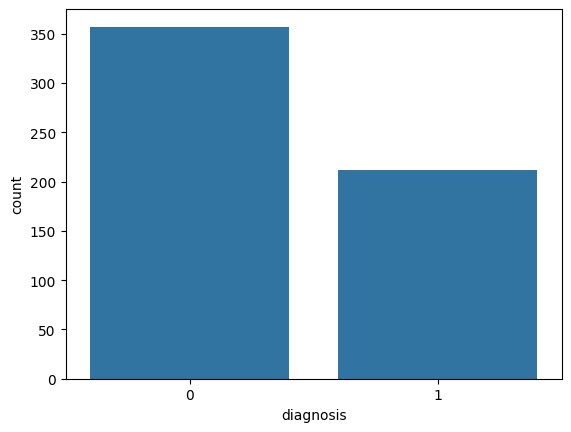

In [484]:
ax = sns.countplot(x='diagnosis', data=data)
plt.show()

## 2. Exploratory Data Analysis

In [485]:
x = data.drop(columns=['diagnosis'])
y = data['diagnosis']

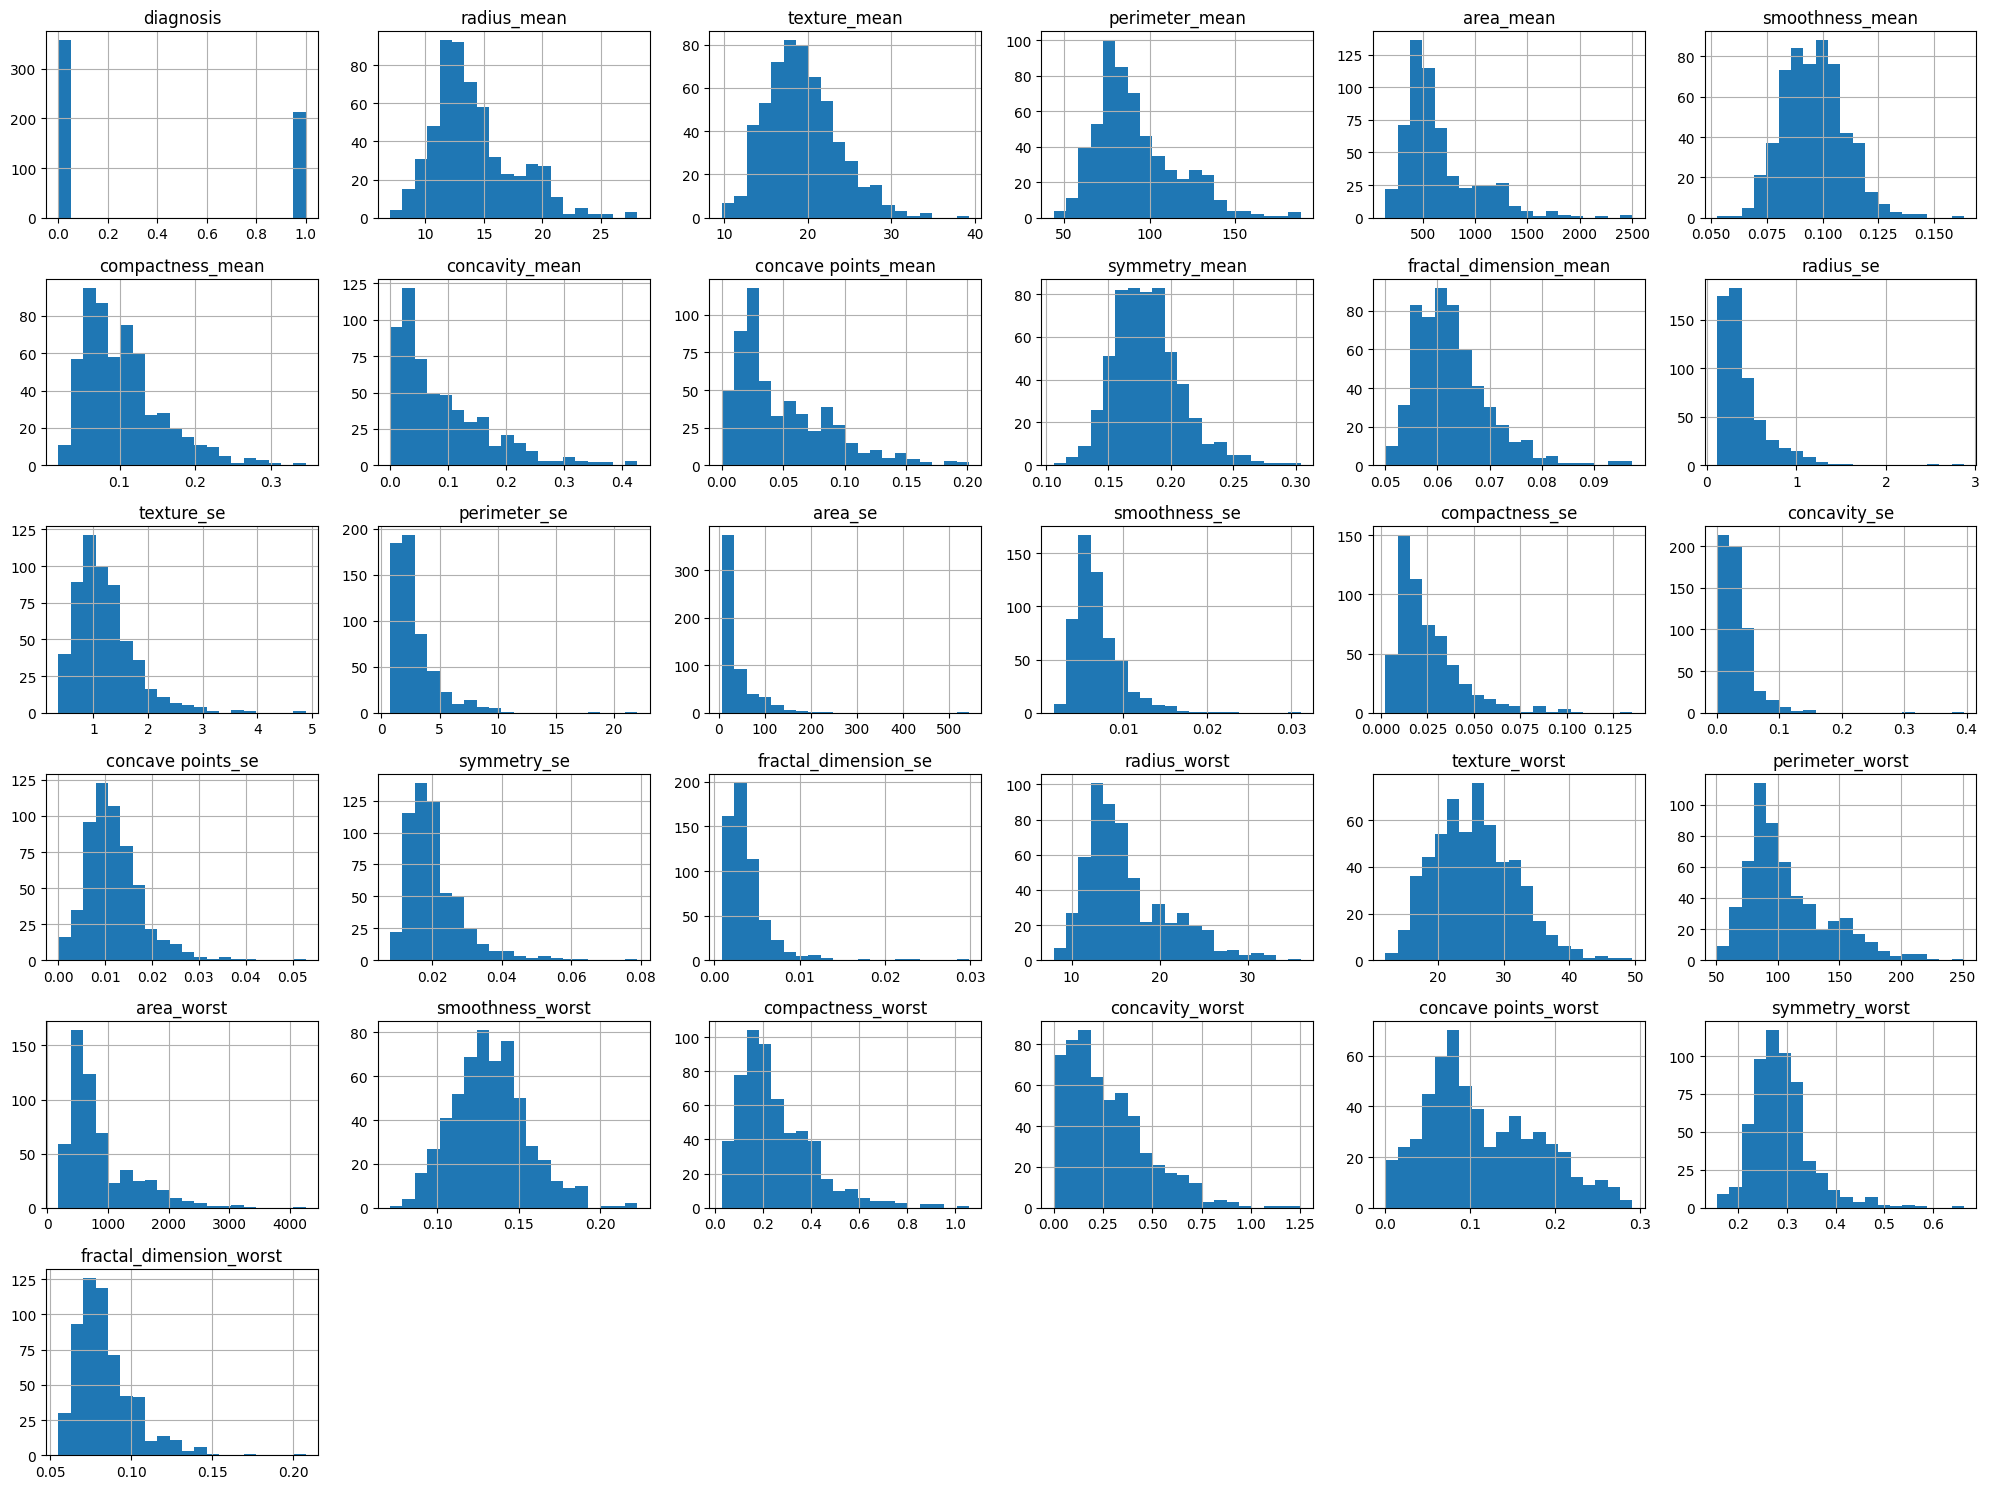

In [486]:
data.hist(bins=20, figsize=(20, 15))
plt.tight_layout()
plt.show()

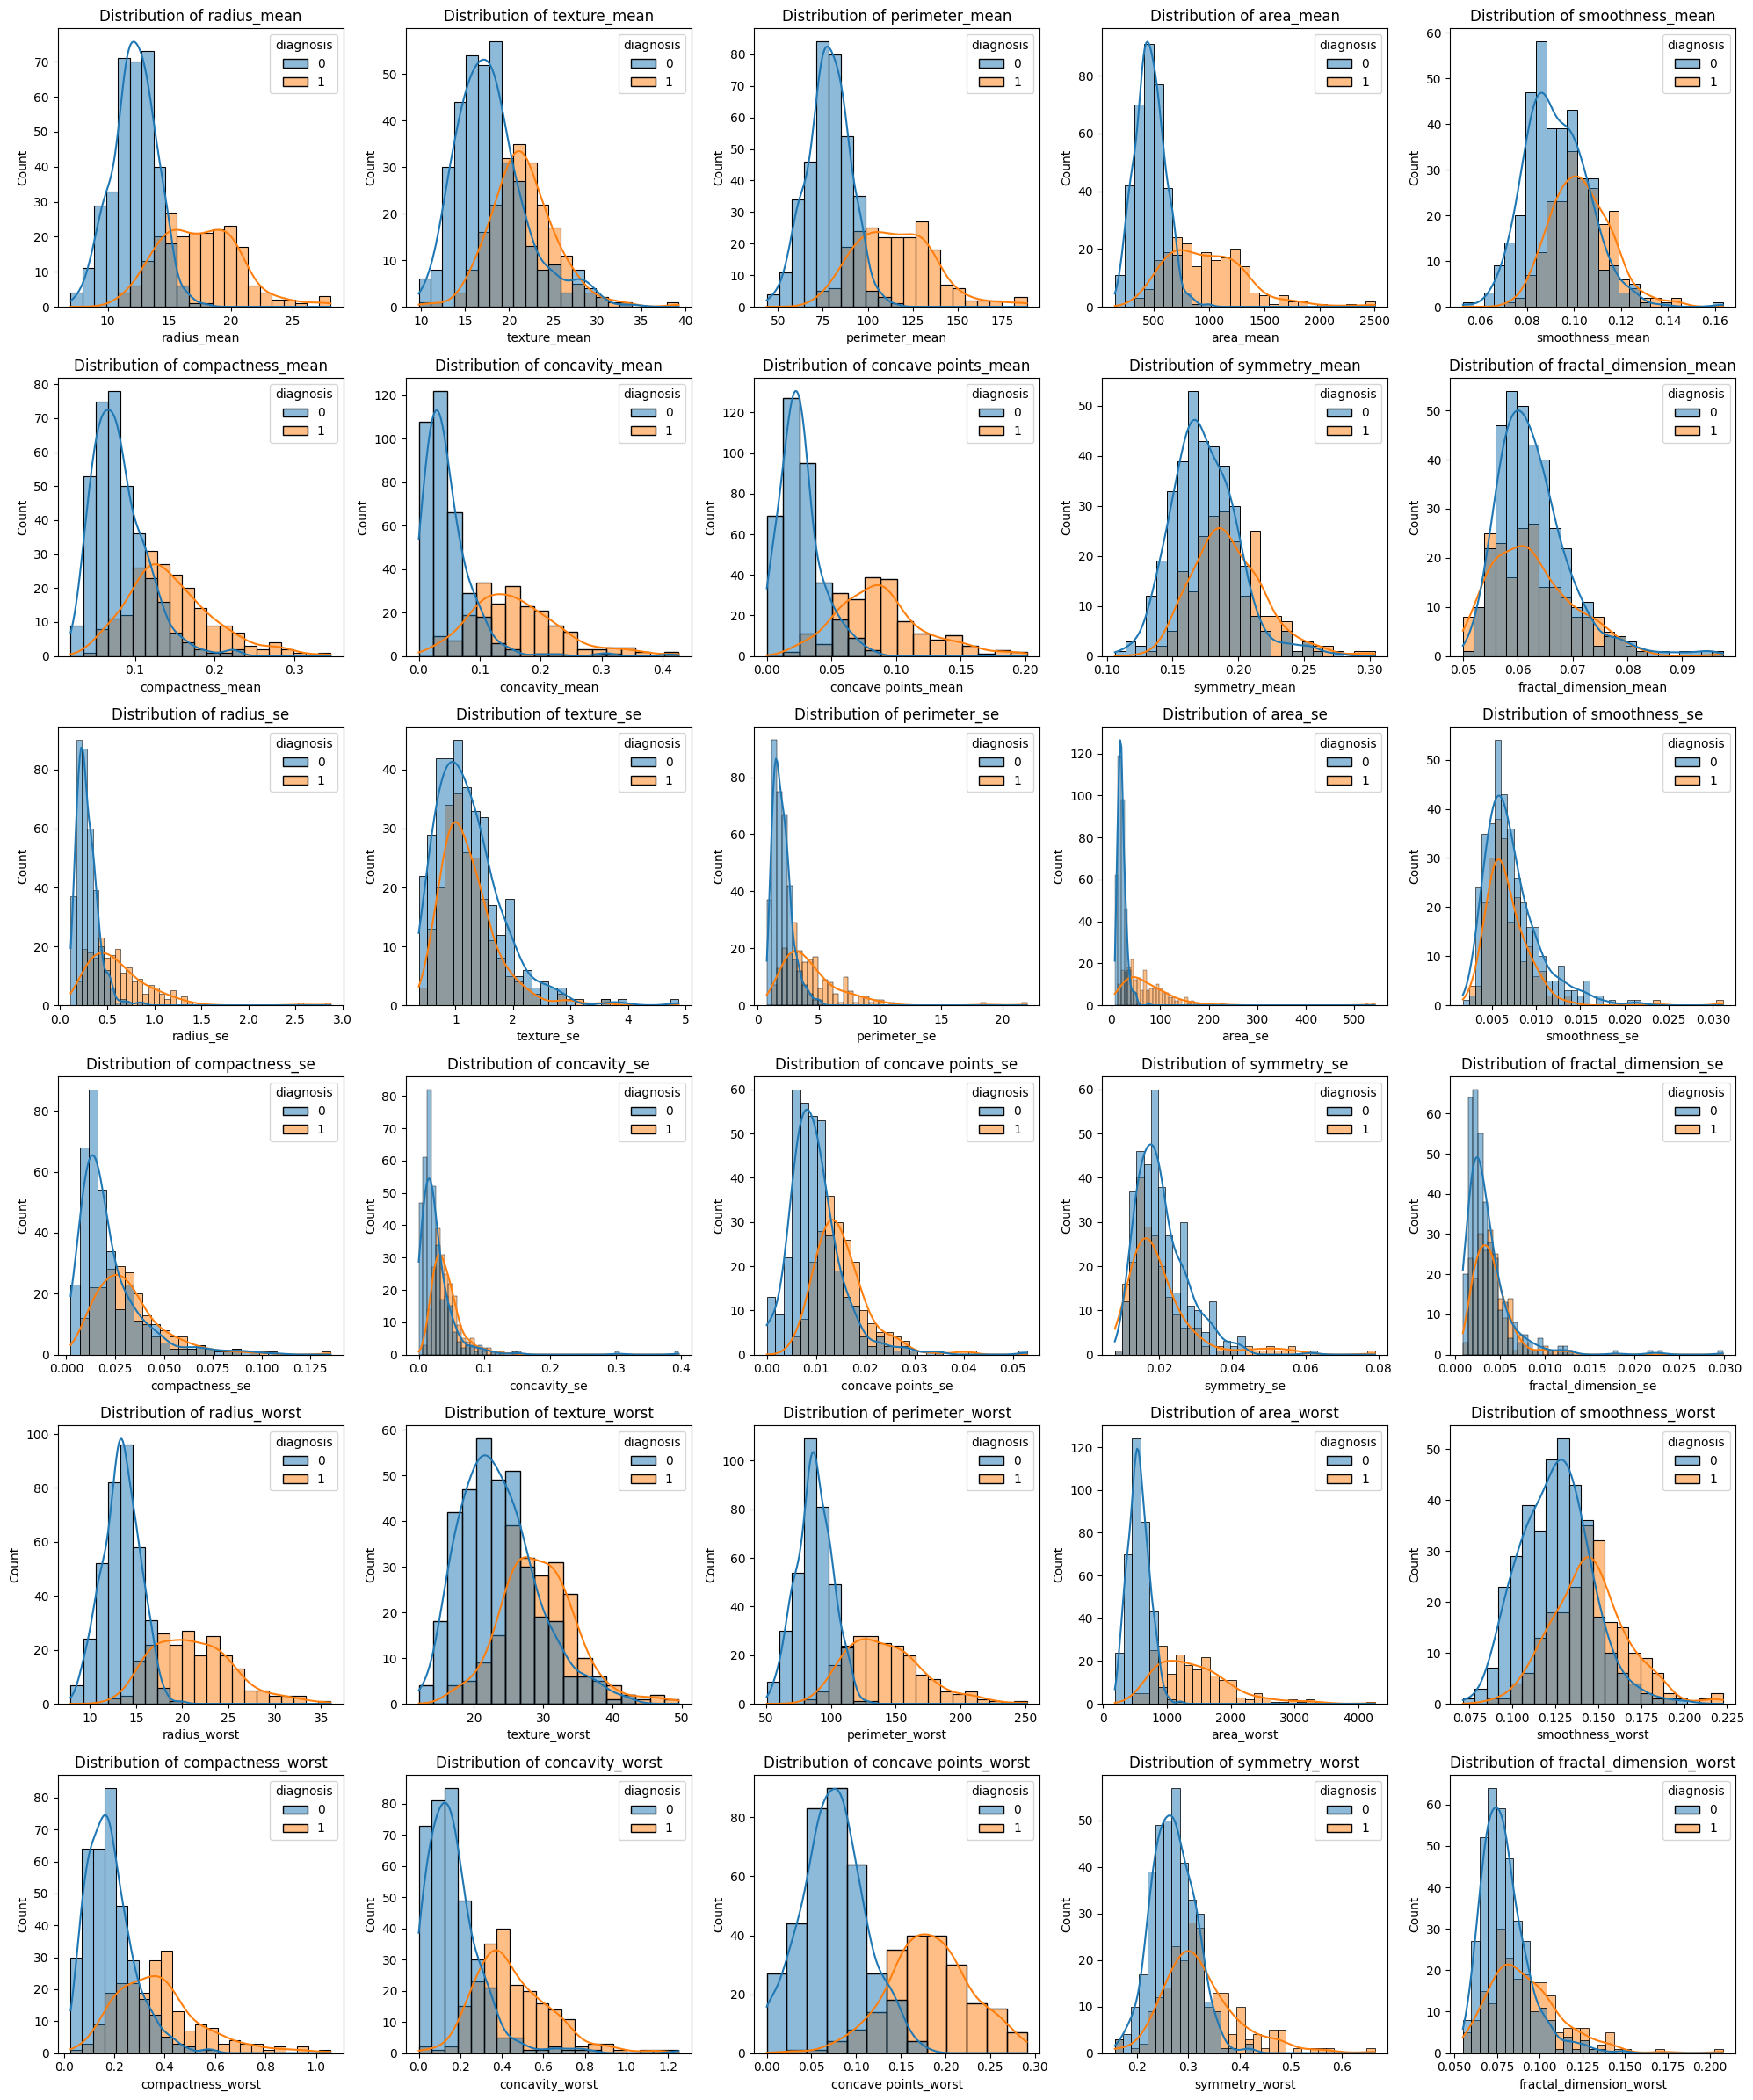

In [545]:
# distributions of features for each diagnosis
features = x.columns
len_features = len(features)
cols = 5
rows = (len_features + cols - 1) // cols

plt.figure(figsize=(20, 4 * rows))
for i, feature in enumerate(features):
    plt.subplot(rows, cols, i + 1)
    sns.histplot(data=data, x=feature, hue='diagnosis', kde=True)
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Count')

plt.tight_layout()
plt.show()

Correlation matrices

In [488]:
mean = [col for col in x.columns if 'mean' in col]
error = [col for col in x.columns if 'se' in col]
worst = [col for col in x.columns if 'worst' in col]

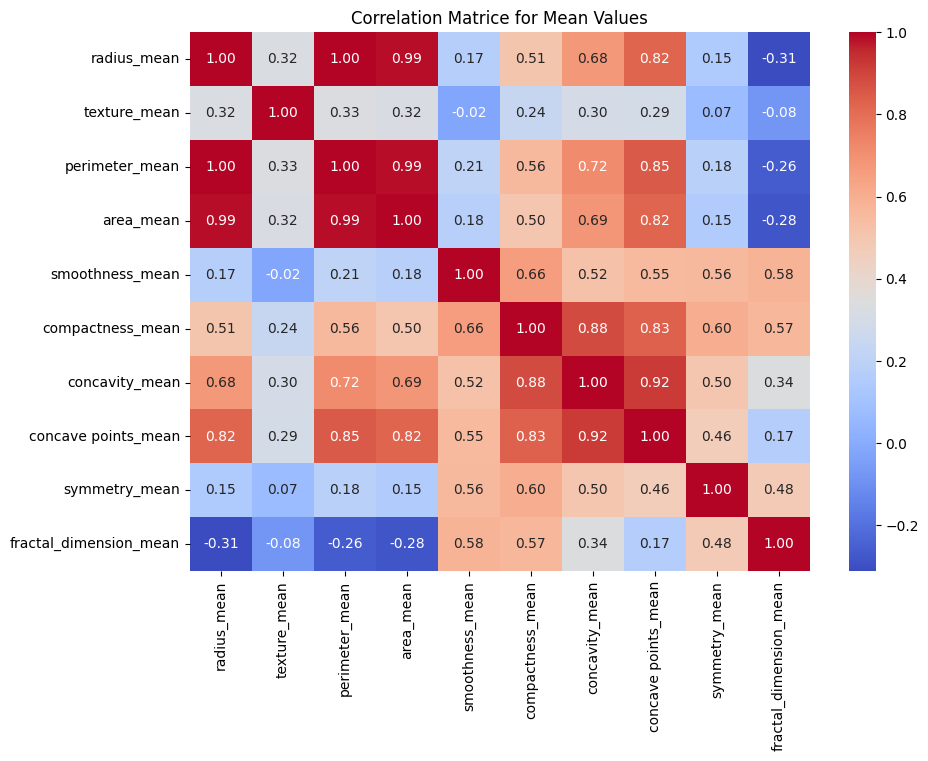

In [489]:
plt.figure(figsize=(10, 7))
plt.subplot(1, 1, 1)
sns.heatmap(x[mean].corr(), annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Matrice for Mean Values')
plt.show()

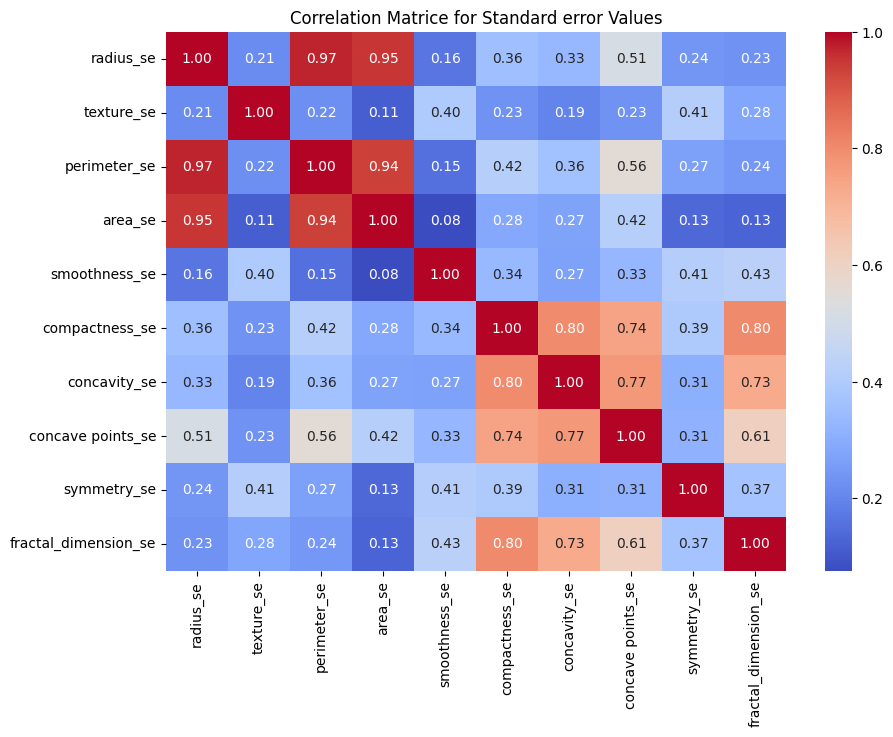

In [490]:
plt.figure(figsize=(10, 7))
plt.subplot(1, 1, 1)
sns.heatmap(x[error].corr(), annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Matrice for Standard error Values')
plt.show()


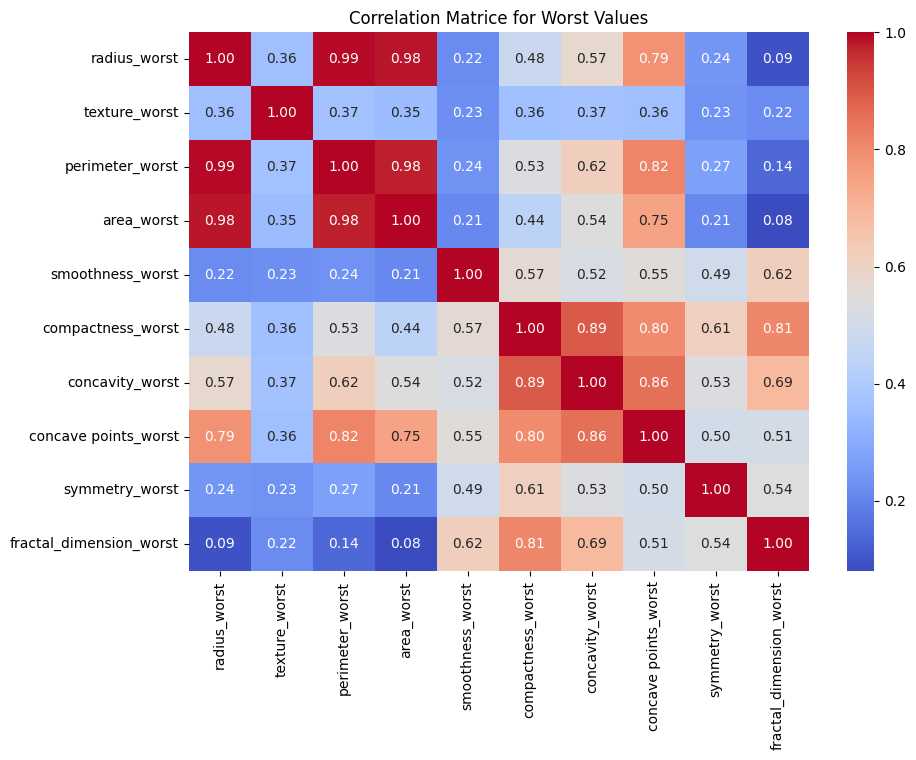

In [491]:
plt.figure(figsize=(10, 7))
plt.subplot(1, 1, 1)
sns.heatmap(x[worst].corr(), annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Matrice for Worst Values')
plt.show()

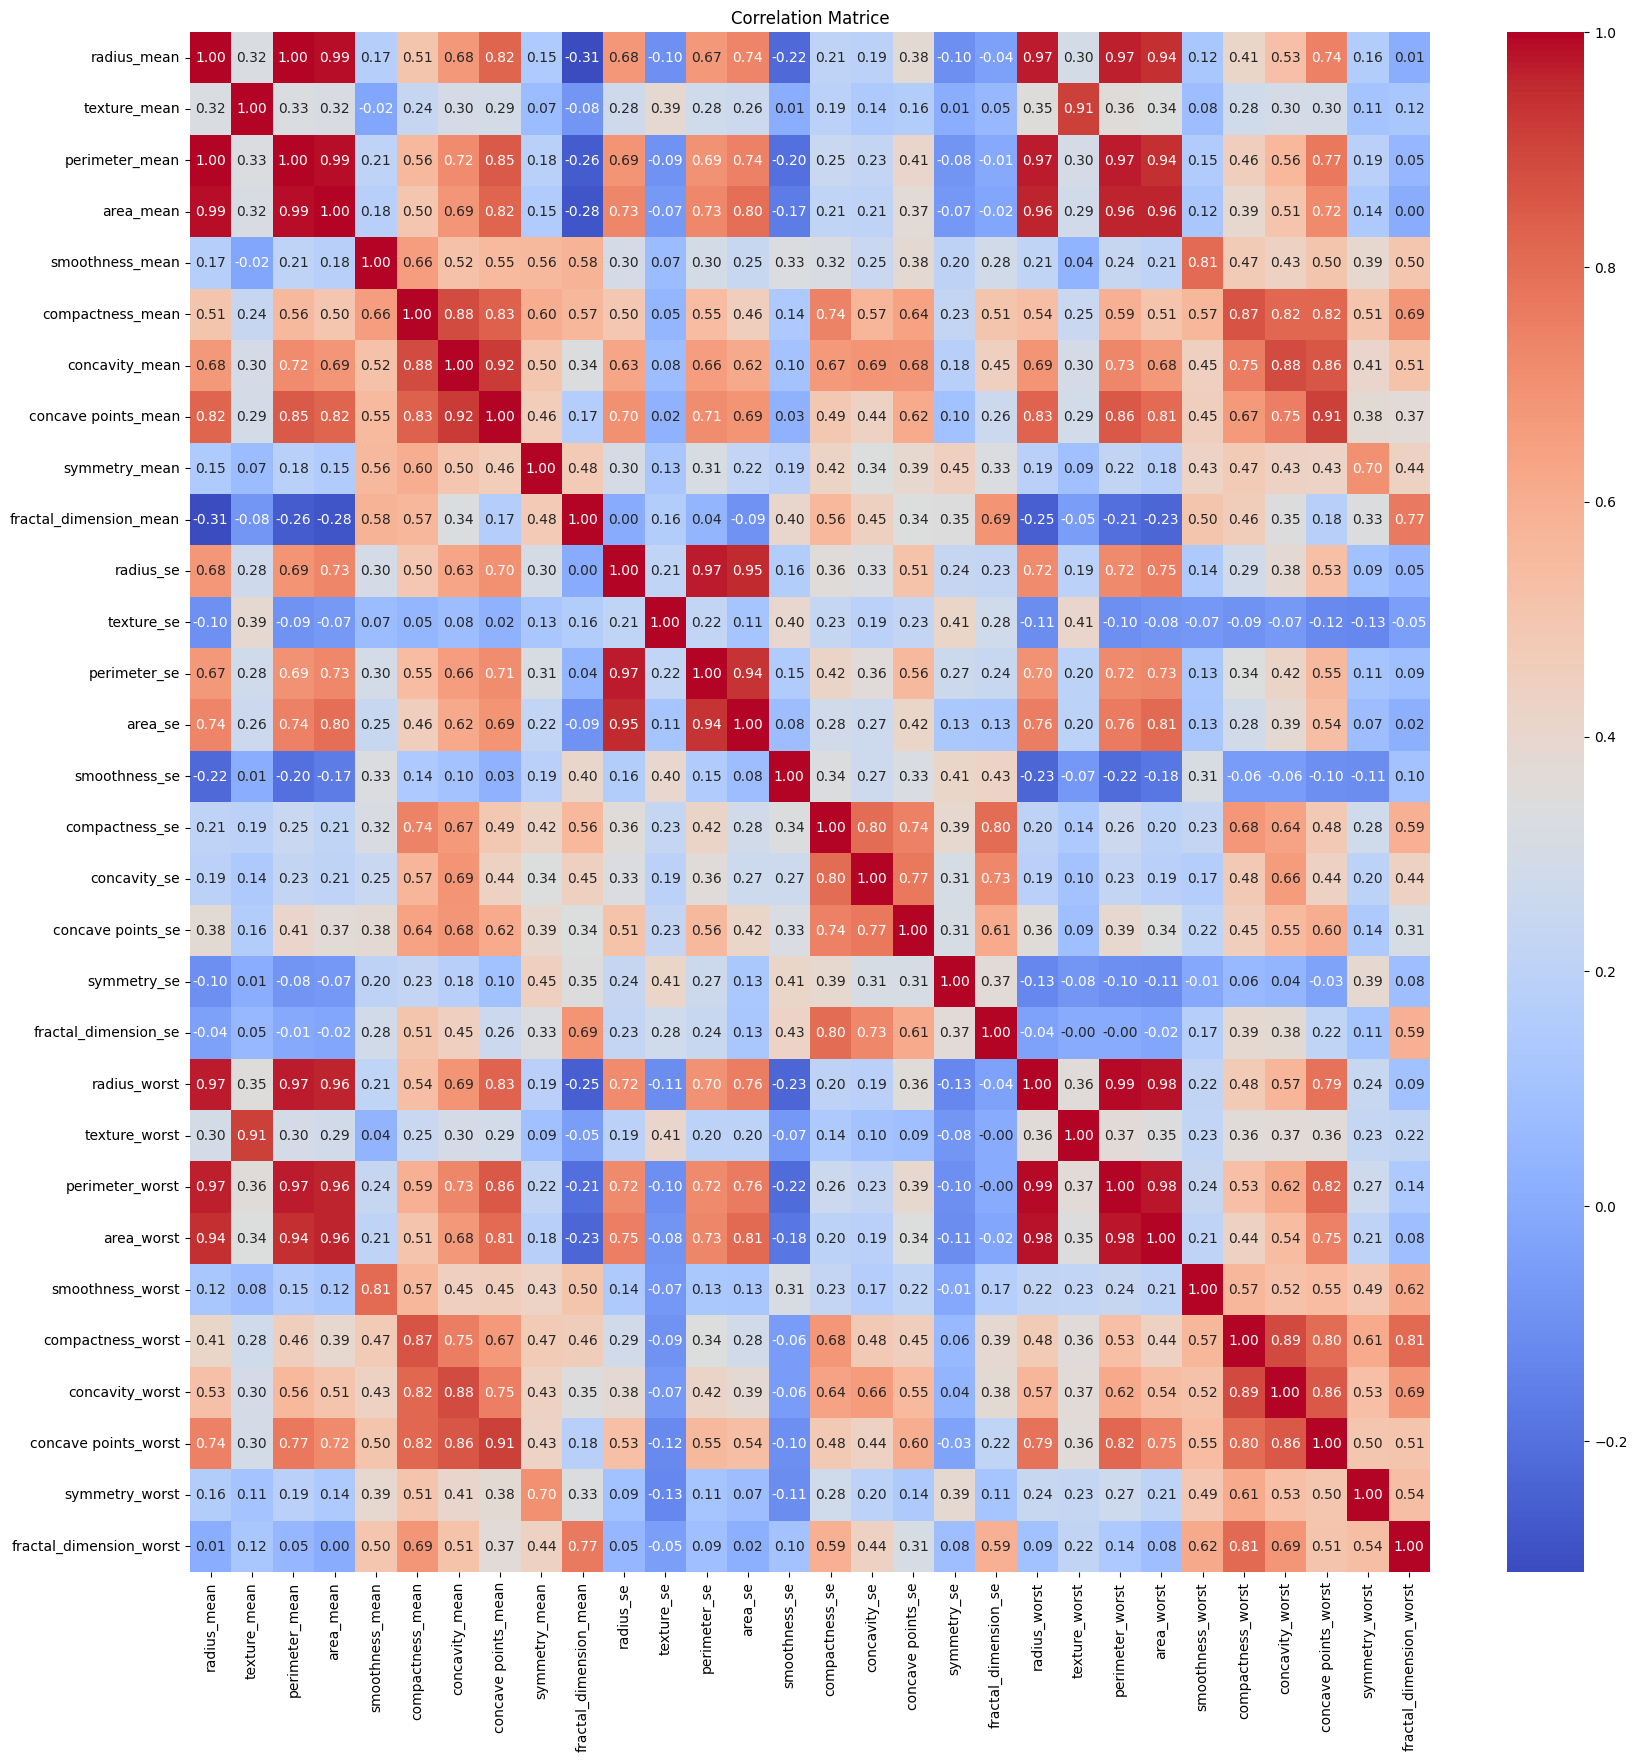

In [492]:
plt.figure(figsize=(20, 20))
plt.subplot(1, 1, 1)
sns.heatmap(x.corr(), annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Matrice')
plt.show()

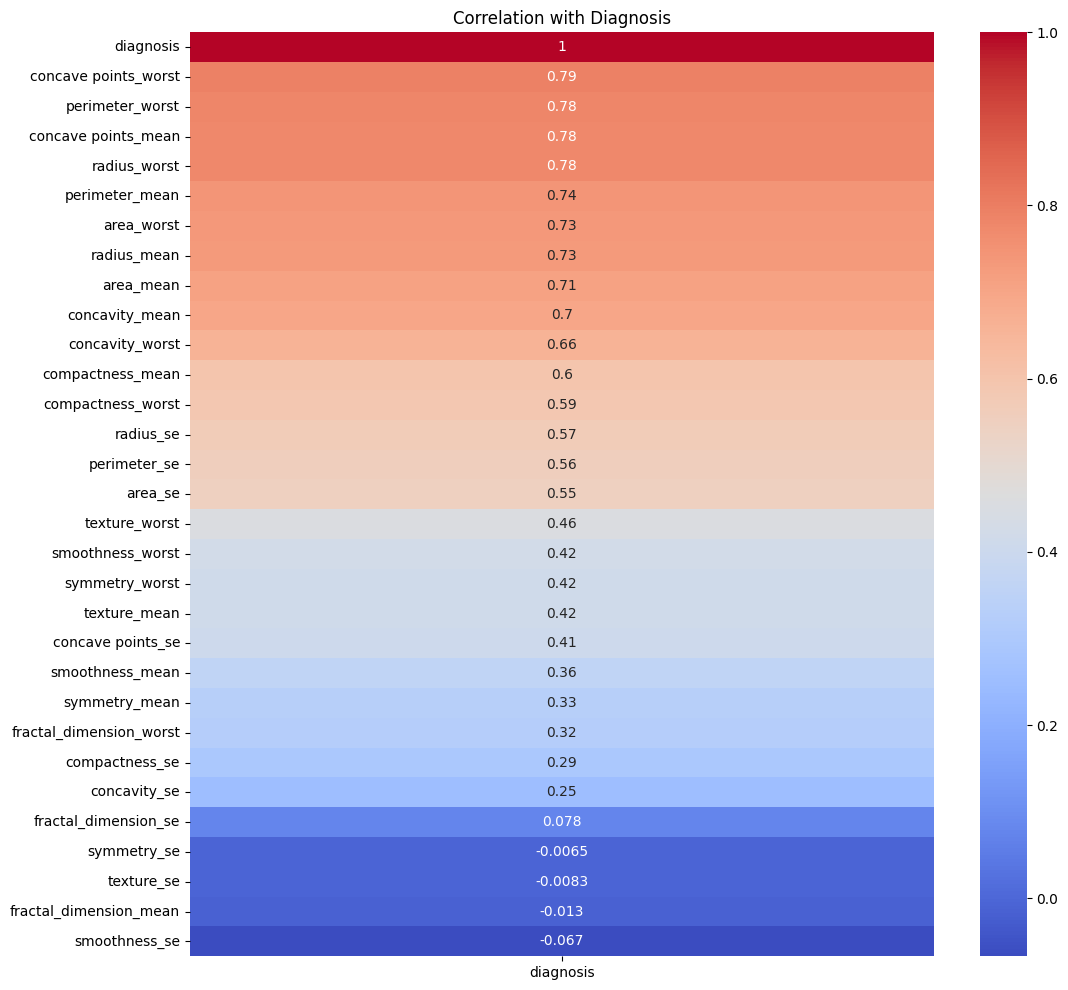

In [493]:
plt.figure(figsize=(12,12))
correlation = data.corr()
sns.heatmap(correlation[['diagnosis']].sort_values(by='diagnosis', ascending=False), annot=True, cmap='coolwarm')
plt.title("Correlation with Diagnosis")
plt.show()

## 3. Data Prepocessing

In [494]:
data.isnull().any()

,0
diagnosis,False
radius_mean,False
texture_mean,False
perimeter_mean,False
area_mean,False
smoothness_mean,False
compactness_mean,False
concavity_mean,False
concave points_mean,False
symmetry_mean,False


In [495]:
data['diagnosis'].value_counts()

,count
diagnosis,
0,357
1,212


In [496]:
data.describe()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,0.372583,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,0.483918,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,0.000000,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,0.000000,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,0.000000,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,1.000000,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,1.000000,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


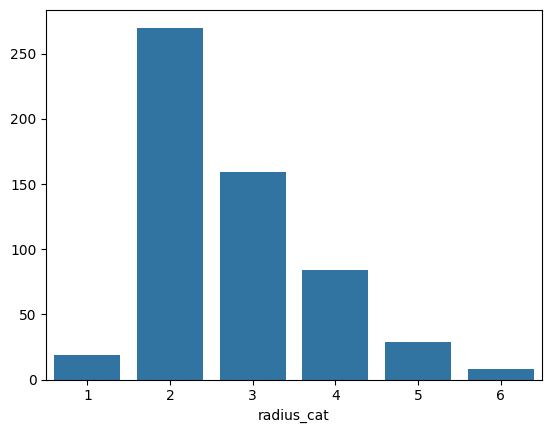

In [497]:
data['radius_cat'] = pd.cut(data['radius_worst'], bins=[7, 10, 15, 20, 25, 30, 40], labels=['1', '2', '3', '4', '5', '6'])
r_cat = data['radius_cat'].value_counts()
sns.barplot(x=r_cat.index, y=r_cat.values)
plt.show()

In [498]:
def split_data(data):
  splitter = StratifiedShuffleSplit(n_splits=10, test_size=0.3, random_state=42)

  split_list = []
  for i, j in splitter.split(data, data['radius_cat']):
    train_set = data.iloc[i]
    test_set = data.iloc[j]
    split_list.append([train_set, test_set])
  return split_list

split_list = split_data(data)

In [499]:
train, test = split_list[0]

In [500]:
train.shape, test.shape

((398, 32), (171, 32))

In [501]:
for col in (train, test):
  col.drop('radius_cat', axis=1, inplace=True)

In [502]:
train.shape, test.shape

((398, 31), (171, 31))

In [503]:
x = train.drop(columns=['diagnosis'])
y = train['diagnosis']

In [504]:
num_pipeline = make_pipeline(
  SimpleImputer(strategy='median'),
  StandardScaler()
)
num_pipeline

Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='median')),
                ('standardscaler', StandardScaler())])

In [505]:
x_num = x.select_dtypes(include='number')
x_tran = num_pipeline.fit_transform(x_num)
x_tran

array([[-7.52901063e-01, -1.10403542e+00, -7.42355545e-01, ...,
        -6.00787792e-01,  1.09636113e-01,  5.10845955e-01],
       [-6.40133850e-01, -2.54963330e-01, -6.06438137e-01, ...,
        -9.55334159e-04,  8.59697894e-01,  2.75563150e-02],
       [-1.34070016e+00,  5.01523770e-01, -1.32969834e+00, ...,
        -1.15687455e+00, -3.86007727e-03, -8.61628384e-03],
       ...,
       [-9.72797127e-01,  2.05703441e-01, -9.25619558e-01, ...,
        -4.23222802e-01, -4.43040988e-01,  2.26802105e-01],
       [-7.38805161e-01, -1.13790797e+00, -7.15416960e-01, ...,
        -6.78709810e-01, -8.97025750e-01, -1.09425166e-01],
       [ 1.59265696e+00,  6.03141440e-01,  1.54375077e+00, ...,
         1.89772933e+00, -1.74926799e-01, -4.17188753e-01]])

In [506]:
def preprocessing(data):
  x = data.drop(columns=['diagnosis'])
  y = data['diagnosis']
  x_num = x.select_dtypes(include='number')
  x_tran = num_pipeline.fit_transform(x_num)
  return x_tran, y

In [507]:
x_train, y_train = preprocessing(train)
x_test, y_test = preprocessing(test)

In [508]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((398, 30), (398,), (171, 30), (171,))

## 4. Model training

In [509]:
def cross_validation(model, x, y):
  score = cross_val_score(model, x, y, cv=5)
  return pd.Series(score)

In [663]:
def classi_rep(model, x, y):
  print("score:",model.score(x, y))
  score = cross_validation(model, x, y)
  print(score.describe())
  y_pred = model.predict(x)
  print(classification_report(y, y_pred, target_names=['Benign', 'Maglinant']))

In [664]:
log_reg = LogisticRegression()
log_reg.fit(x_train, y_train)
classi_rep(log_reg, x_train, y_train)

score: 0.9874371859296482
count    5.000000
mean     0.974842
std      0.019940
min      0.949367
25%      0.962500
50%      0.975000
75%      0.987342
max      1.000000
dtype: float64
              precision    recall  f1-score   support

      Benign       0.98      1.00      0.99       249
   Maglinant       0.99      0.97      0.98       149

    accuracy                           0.99       398
   macro avg       0.99      0.98      0.99       398
weighted avg       0.99      0.99      0.99       398



In [665]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train, y_train)
classi_rep(knn, x_train, y_train)

score: 0.9698492462311558
count    5.000000
mean     0.957247
std      0.021080
min      0.936709
25%      0.937500
50%      0.962025
75%      0.962500
max      0.987500
dtype: float64
              precision    recall  f1-score   support

      Benign       0.96      1.00      0.98       249
   Maglinant       0.99      0.93      0.96       149

    accuracy                           0.97       398
   macro avg       0.98      0.96      0.97       398
weighted avg       0.97      0.97      0.97       398



In [666]:
rf = RandomForestClassifier(random_state=42)
rf.fit(x_train, y_train)
classi_rep(rf, x_train, y_train)

score: 1.0
count    5.000000
mean     0.957215
std      0.014614
min      0.936709
25%      0.949367
50%      0.962500
75%      0.962500
max      0.975000
dtype: float64
              precision    recall  f1-score   support

      Benign       1.00      1.00      1.00       249
   Maglinant       1.00      1.00      1.00       149

    accuracy                           1.00       398
   macro avg       1.00      1.00      1.00       398
weighted avg       1.00      1.00      1.00       398



In [514]:
from scipy.stats import randint

param_dist = {
    'n_estimators': randint(50, 300),
    'max_depth': randint(5, 30),
    'min_samples_split': randint(2, 10),
    'min_samples_leaf': randint(1, 10),
    'max_features': randint(2, 10),
}

random_search = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_dist,
    n_iter=100,
    cv=5,
    scoring='accuracy',
    random_state=42,
    n_jobs=-1
)
random_search.fit(x_train, y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7accc5bb9490>,
                                        'max_features': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7accc516cc90>,
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7accc4966250>,
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7accc5962390>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7accc4c4efd0>},
                   random_state=42, scoring='accuracy')

In [515]:
random_search.best_params_

{'max_depth': 11,
 'max_features': 7,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 170}

In [667]:
tuned_rf = random_search.best_estimator_
classi_rep(tuned_rf, x_train, y_train)

score: 1.0
count    5.000000
mean     0.964715
std      0.020920
min      0.936709
25%      0.949367
50%      0.975000
75%      0.975000
max      0.987500
dtype: float64
              precision    recall  f1-score   support

      Benign       1.00      1.00      1.00       249
   Maglinant       1.00      1.00      1.00       149

    accuracy                           1.00       398
   macro avg       1.00      1.00      1.00       398
weighted avg       1.00      1.00      1.00       398



### Model performance on test set

Evaluate model performance on test set using classification_report, log_loss, confusion matrix and Receiver Operating Characteristic curve

In [668]:
def display_log_loss(model, x_test, y_test):
  y_pred_proba = model.predict_proba(x_test)
  loss = log_loss(y_test, y_pred_proba)
  print("log loss:",loss)

In [669]:
def plot_confusion_matrix(model, x_test, y_test):
  y_pred_log = model.predict(x_test)
  cm = confusion_matrix(y_test, y_pred_log)
  tn, fn, fp, tp = cm.ravel()
  print('True Positives:', tp)
  print('False Negatives:', fn)
  print('False Positives:', fp)
  print('True Negatives:', tn)

  # Calculate percentages
  cm_percent = cm.astype('int') / cm.sum(axis=1)[:, np.newaxis]

  # Create annotations with percentages
  labels = ['TN', 'FP', 'FN', 'TP']
  labels = np.asarray(labels).reshape(2,2)
  val_percent = []
  for val, percent in zip(cm.ravel(), cm_percent.ravel()):
    val_percent.append(f'{val}\n ({percent:.2%})')
  annot = np.asarray(val_percent).reshape(2,2)

  sns.heatmap(cm, annot=annot, fmt='', cmap='Blues')
  plt.title('Confusion Matrix')
  plt.xlabel('Predicted')
  plt.ylabel('Actual')
  plt.show()

In [670]:
def plot_roc_curve(model, x_test, y_test):
  y_pred_proba = model.predict_proba(x_test)[:, 1]
  fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
  roc_auc = auc(fpr, tpr)

  plt.figure()
  plt.plot(fpr, tpr, color='darkorange', label=f'ROC curve (AUC = {roc_auc:.3f})')
  plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')
  plt.title('Receiver Operating Characteristic')
  plt.legend(loc='lower right')
  plt.grid()
  plt.show()

In [671]:
classi_rep(log_reg, x_test, y_test)

score: 0.9766081871345029
count    5.000000
mean     0.988235
std      0.016109
min      0.970588
25%      0.970588
50%      1.000000
75%      1.000000
max      1.000000
dtype: float64
              precision    recall  f1-score   support

      Benign       0.99      0.97      0.98       108
   Maglinant       0.95      0.98      0.97        63

    accuracy                           0.98       171
   macro avg       0.97      0.98      0.98       171
weighted avg       0.98      0.98      0.98       171



In [611]:
display_log_loss(log_reg, x_test, y_test)

log loss: 0.06620293255412131


True Positives: 62
False Negatives: 3
False Positives: 1
True Negatives: 105


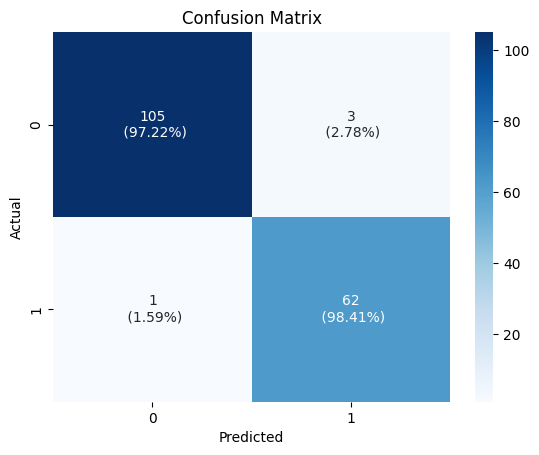

In [598]:
plot_confusion_matrix(log_reg, x_test, y_test)

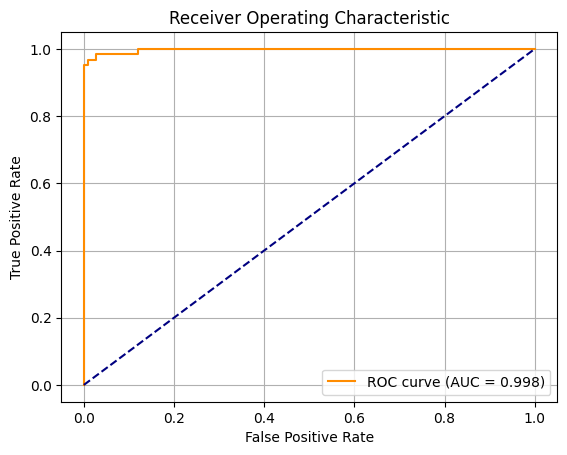

In [599]:
plot_roc_curve(log_reg, x_test, y_test)

In [672]:
classi_rep(knn, x_test, y_test)

score: 0.9649122807017544
count    5.000000
mean     0.959328
std      0.025179
min      0.914286
25%      0.970588
50%      0.970588
75%      0.970588
max      0.970588
dtype: float64
              precision    recall  f1-score   support

      Benign       0.99      0.95      0.97       108
   Maglinant       0.93      0.98      0.95        63

    accuracy                           0.96       171
   macro avg       0.96      0.97      0.96       171
weighted avg       0.97      0.96      0.97       171



In [613]:
display_log_loss(knn, x_test, y_test)

log loss: 0.274043880483728


True Positives: 62
False Negatives: 5
False Positives: 1
True Negatives: 103


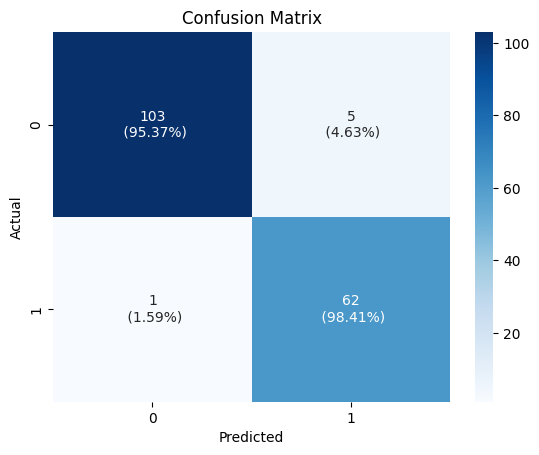

In [604]:
plot_confusion_matrix(knn, x_test, y_test)

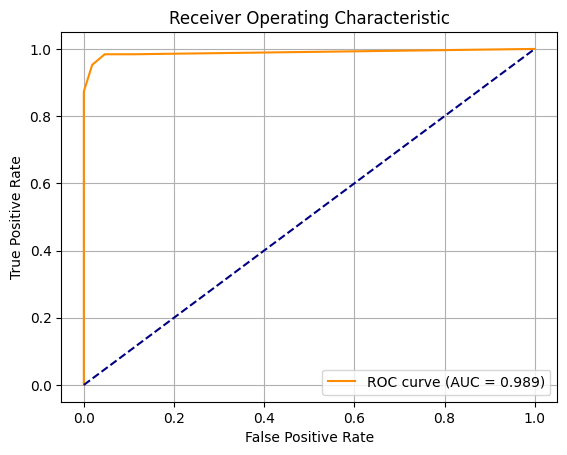

In [605]:
plot_roc_curve(knn, x_test, y_test)

In [673]:
classi_rep(tuned_rf, x_test, y_test)

score: 0.9532163742690059
count    5.000000
mean     0.935798
std      0.024024
min      0.911765
25%      0.914286
50%      0.941176
75%      0.941176
max      0.970588
dtype: float64
              precision    recall  f1-score   support

      Benign       0.98      0.94      0.96       108
   Maglinant       0.91      0.97      0.94        63

    accuracy                           0.95       171
   macro avg       0.95      0.96      0.95       171
weighted avg       0.95      0.95      0.95       171



In [654]:
display_log_loss(tuned_rf, x_test, y_test)

log loss: 0.3138893767409325


True Positives: 61
False Negatives: 6
False Positives: 2
True Negatives: 102


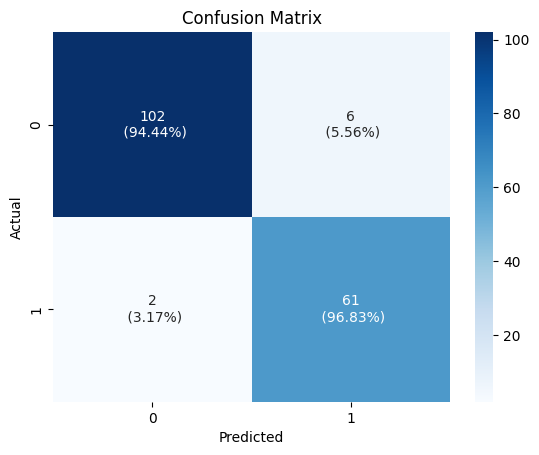

In [655]:
plot_confusion_matrix(tuned_rf, x_test, y_test)

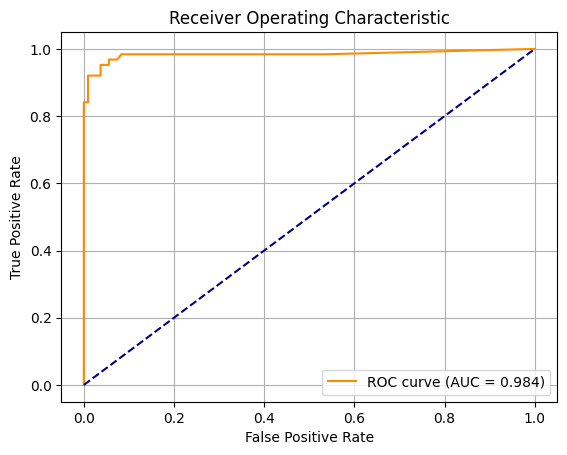

In [656]:
plot_roc_curve(tuned_rf, x_test, y_test)

## 5. Evaluate

Model Comparison:
| Model                 |   Accuracy |   Log Loss |
|:----------------------|-----------:|-----------:|
| Logistic Regression   |   0.976608 |  0.0662029 |
| KNeighbors Classifier |   0.964912 |  0.274044  |
| Random Forest (Tuned) |   0.953216 |  0.313889  |


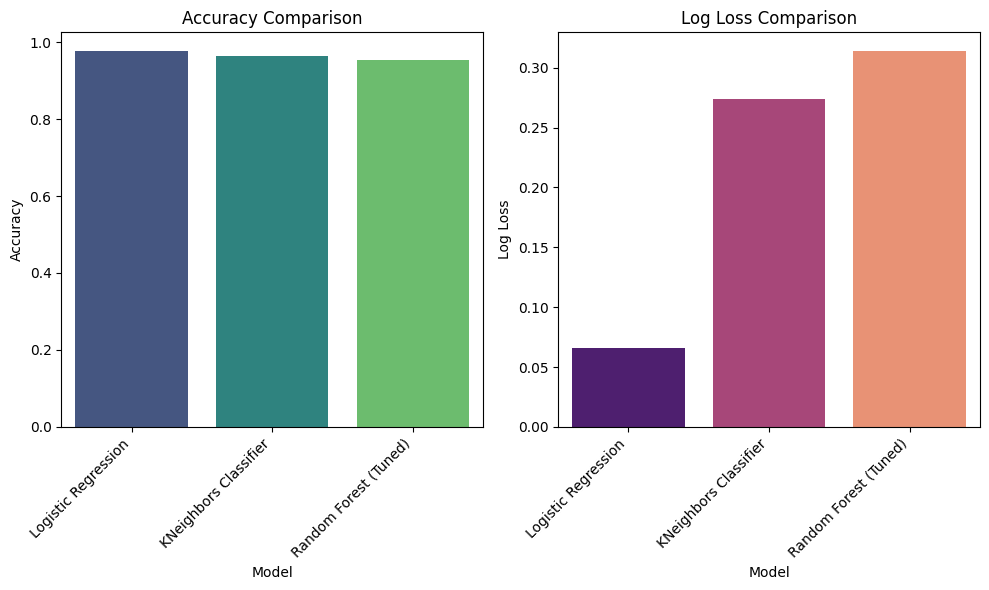

In [657]:
# take accuracy and log loss of the model
def evaluate_model(model, x_test, y_test):
  accuracy = accuracy_score(y_test, model.predict(x_test))
  y_pred_proba = model.predict_proba(x_test)
  loss = log_loss(y_test, y_pred_proba)
  return accuracy, loss

log_reg_acc, log_reg_loss = evaluate_model(log_reg, x_test, y_test)
knn_acc, knn_loss = evaluate_model(knn, x_test, y_test)
rf_acc, rf_loss = evaluate_model(tuned_rf, x_test, y_test)

# create a comparison data
comparison_data = {
    'Model': ['Logistic Regression', 'KNeighbors Classifier', 'Random Forest (Tuned)'],
    'Accuracy': [log_reg_acc, knn_acc, rf_acc],
    'Log Loss': [log_reg_loss, knn_loss, rf_loss]
}
comparison_df = pd.DataFrame(comparison_data)
comparison_df = comparison_df.sort_values(by='Accuracy', ascending=False)
print("Model Comparison:")
print(comparison_df.to_markdown(index=False))

plt.figure(figsize=(10, 6))

# Accuracy visualization
plt.subplot(1, 2, 1)
sns.barplot(x='Model', y='Accuracy', data=comparison_df, palette='viridis')
plt.title('Accuracy Comparison')
plt.ylabel('Accuracy')
plt.xticks(rotation=45, ha='right')

# Log_loss visualization
plt.subplot(1, 2, 2)
sns.barplot(x='Model', y='Log Loss', data=comparison_df.sort_values(by='Log Loss', ascending=True), palette='magma')
plt.title('Log Loss Comparison')
plt.ylabel('Log Loss')
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

Feature importance

Use permutation importance to find important features

In [649]:
from sklearn.inspection import permutation_importance

def feature_importance(model, x_test, y_test):
  perm_imp = permutation_importance(model, x_test, y_test, n_repeats=30, random_state=42)
  for i in np.argsort(perm_imp.importances_mean)[::-1]:
    print(f"{x.columns[i]}: {perm_imp.importances_mean[i]:.3f}")

Logistic regression

In [661]:
feature_importance(log_reg, x_test, y_test)

texture_worst: 0.019
symmetry_worst: 0.019
radius_se: 0.016
fractal_dimension_worst: 0.013
concavity_worst: 0.012
symmetry_mean: 0.011
concave points_mean: 0.010
concave points_worst: 0.010
smoothness_worst: 0.010
compactness_se: 0.009
texture_mean: 0.009
area_worst: 0.008
concavity_mean: 0.008
area_se: 0.008
fractal_dimension_se: 0.007
compactness_mean: 0.007
compactness_worst: 0.007
radius_worst: 0.006
smoothness_mean: 0.006
perimeter_worst: 0.006
concave points_se: 0.004
smoothness_se: 0.004
perimeter_se: 0.004
symmetry_se: 0.003
area_mean: 0.002
fractal_dimension_mean: 0.002
radius_mean: 0.001
texture_se: 0.001
perimeter_mean: 0.001
concavity_se: 0.001


K-Nearest Neighbors

In [651]:
feature_importance(knn, x_test, y_test)

texture_worst: 0.008
fractal_dimension_se: 0.005
symmetry_worst: 0.004
fractal_dimension_mean: 0.003
radius_worst: 0.003
area_worst: 0.002
compactness_se: -0.000
texture_mean: -0.000
perimeter_worst: -0.001
smoothness_worst: -0.001
radius_se: -0.001
smoothness_se: -0.002
area_se: -0.002
radius_mean: -0.002
area_mean: -0.003
concavity_se: -0.003
symmetry_mean: -0.004
texture_se: -0.004
fractal_dimension_worst: -0.006
perimeter_mean: -0.006
symmetry_se: -0.006
smoothness_mean: -0.007
concave points_worst: -0.007
concavity_worst: -0.007
concavity_mean: -0.008
perimeter_se: -0.008
compactness_mean: -0.009
concave points_mean: -0.009
compactness_worst: -0.012
concave points_se: -0.014


Random Forest (tuned)

In [658]:
feature_importance(tuned_rf, x_test, y_test)

texture_worst: 0.014
smoothness_worst: 0.008
compactness_worst: 0.006
concave points_worst: 0.005
area_se: 0.005
texture_mean: 0.002
area_worst: 0.001
symmetry_mean: 0.001
radius_worst: 0.001
concavity_worst: 0.001
concave points_se: 0.000
symmetry_worst: 0.000
fractal_dimension_worst: 0.000
fractal_dimension_se: 0.000
radius_mean: 0.000
concavity_se: 0.000
symmetry_se: 0.000
smoothness_se: 0.000
perimeter_se: 0.000
radius_se: 0.000
fractal_dimension_mean: 0.000
compactness_se: 0.000
area_mean: 0.000
compactness_mean: 0.000
perimeter_mean: 0.000
texture_se: -0.001
smoothness_mean: -0.001
concavity_mean: -0.004
concave points_mean: -0.005
perimeter_worst: -0.007


## 7. Conclusion

The Logistic Regression model demonstrates strong performance on this dataset.

- On the training data, it achieves an overall accuracy of 98%, with 100% recall for the Benign class and 97% recall for the Malignant class.

- On the test data, it maintains a high overall accuracy of 97%, with 97% recall for the Benign class and 98% recall for the Malignant class.

- The most important feature contributing to the model’s prediction is worst texture, which suggests that texture characteristics of the tumor, particularly at their worst measurement, play a critical role in distinguishing between benign and malignant cases.


